In [1]:
# Import Libraries
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [2]:
# Load Datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape) # 4차원 Tensor
print(X_test.shape)

170508288/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Preprocessing

1. Normalization


2. Standardization

In [3]:
# min-max scaling
# RGB : [0, 255]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.

### Training with Vanilla CNN

**Model Architecture**

> Conv - Relu - Conv - Relu - Pool - Conv - Relu - Conv - Relu - Pool - FC - Softmax

In [4]:
model = Sequential([
                    Conv2D(input_shape=(32, 32, 3), filters=6, kernel_size=(3, 3),
                           strides=(1, 1), padding="same", activation='relu'),
                    Conv2D(16, 3, 1, padding="same", activation='relu'),
                    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
                    Conv2D(24, 3, 1, padding="same", activation='relu'),
                    Conv2D(48, 3, 1, padding="same", activation='relu'),
                    MaxPool2D(), 
                    Flatten(), # activation map : 48 x 8 x 8
                    Dense(1024, activation='relu'), # fully-connected
                    Dense(10, activation="softmax") # output-class 10
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         168       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        880       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 24)        3480      
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                    

In [5]:
# training setup
from tensorflow.keras.optimizers import SGD

## config variables
batch_size = 128
lr = 0.01 # 1e-5
epochs = 15

# Set optimizer, loss function, metrics, callback function
optimizer = SGD(lr, momentum=0.9)
loss_fn = "sparse_categorical_crossentropy" # multi-class classification
metrics = ["accuracy"]

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=metrics)

In [6]:
# model training
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_test, y_test), # 매 epoch마다 validation 성능 체크 가능!
                    verbose=1)

Epoch 1/15
391/391 [==============================] - 16s 18ms/step - loss: 1.8498 - accuracy: 0.3299 - val_loss: 1.4820 - val_accuracy: 0.4581
Epoch 2/15
391/391 [==============================] - 6s 16ms/step - loss: 1.3583 - accuracy: 0.5116 - val_loss: 1.2525 - val_accuracy: 0.5471
Epoch 3/15
391/391 [==============================] - 6s 16ms/step - loss: 1.1366 - accuracy: 0.5975 - val_loss: 1.1146 - val_accuracy: 0.6086
Epoch 4/15
391/391 [==============================] - 6s 16ms/step - loss: 0.9699 - accuracy: 0.6587 - val_loss: 1.0410 - val_accuracy: 0.6382
Epoch 5/15
391/391 [==============================] - 6s 16ms/step - loss: 0.7961 - accuracy: 0.7199 - val_loss: 0.9997 - val_accuracy: 0.6572
Epoch 6/15
391/391 [==============================] - 6s 16ms/step - loss: 0.6415 - accuracy: 0.7753 - val_loss: 1.0240 - val_accuracy: 0.6640
Epoch 7/15
391/391 [==============================] - 6s 17ms/step - loss: 0.4744 - accuracy: 0.8332 - val_loss: 1.1193 - val_accuracy: 0.658

In [7]:
# evaluate
loss, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Loss : %.4f, Accuracy : %.4f" % (loss, acc))

79/79 [==============================] - 1s 9ms/step - loss: 2.1504 - accuracy: 0.6627
Loss : 2.1504, Accuracy : 0.6627


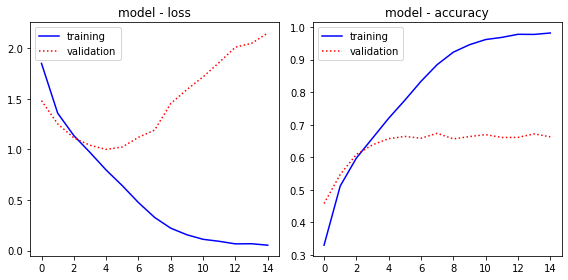

In [8]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(history.history['loss'],'b-', label = "training")
plt.plot(history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(history.history['accuracy'], 'b-', label = "training")
plt.plot(history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()

### 이번엔 ResNet50를 사용해봅시다.

- ResNet50을 사용하기 위해서는 keras에 구현되어 있는 ResNet50 구조를 가져옵니다.

- pretrained를 가져오는 경우도 있지만, 지금은 ImageNet 세팅이 아니므로 구조만 가져옵니다.(input이 완전히 다름)

- Reference : https://keras.io/api/applications/resnet/#resnet50-function

In [9]:
# load ResNet50
from tensorflow.keras.applications import ResNet50   # pretrained model -> ImageNet

resnet = ResNet50(
    include_top=True,  # classification : True,  embedding : False
    weights=None,
    input_shape=(32, 32, 3),
    pooling="avg",
    classes=10,
    classifier_activation="softmax"
)

In [10]:
# see ResNet50 model
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [11]:
### resnet training strategy

batch_size = 32
epochs = 10
lr = 0.1

optimizer = SGD(lr, momentum=0.9)
loss_fn = "sparse_categorical_crossentropy"
metrics = ["accuracy"]

resnet.compile(optimizer=optimizer,
               loss=loss_fn,
               metrics=metrics)

In [12]:
# training ResNet50
resnet_history = resnet.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            verbose=1)

Epoch 1/10
1563/1563 [==============================] - 167s 102ms/step - loss: 3.0882 - accuracy: 0.1753 - val_loss: 2.0689 - val_accuracy: 0.2170
Epoch 2/10
 708/1563 [============>.................] - ETA: 1:22 - loss: 1.9493 - accuracy: 0.2330

KeyboardInterrupt: ignored

In [ ]:
## loss visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.subplot(1, 2,1)
plt.plot(resnet_history.history['loss'],'b-', label = "training")
plt.plot(resnet_history.history['val_loss'], 'r:', label = "validation")
plt.title("model - loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("model - accuracy")

plt.plot(resnet_history.history['accuracy'], 'b-', label = "training")
plt.plot(resnet_history.history['val_accuracy'], 'r:', label = "validation")

plt.legend()
plt.tight_layout()
plt.show()